In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [502]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [503]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [504]:
df['Дата'] = pd.to_datetime(df['Дата'])

print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [505]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество')

Вывести несколько первых строк сгруппированных данных

In [506]:
print(grouped_df.head(10))

        Дата  Количество
0 2018-01-04        1840
1 2018-01-05        1301
2 2018-01-06        1306
3 2018-01-07        1322
4 2018-01-09        1719
5 2018-01-10        1487
6 2018-01-11        1471
7 2018-01-12        1492
8 2018-01-13        1475
9 2018-01-14        1477


Нарисуйте график продаж у `grouped_df`

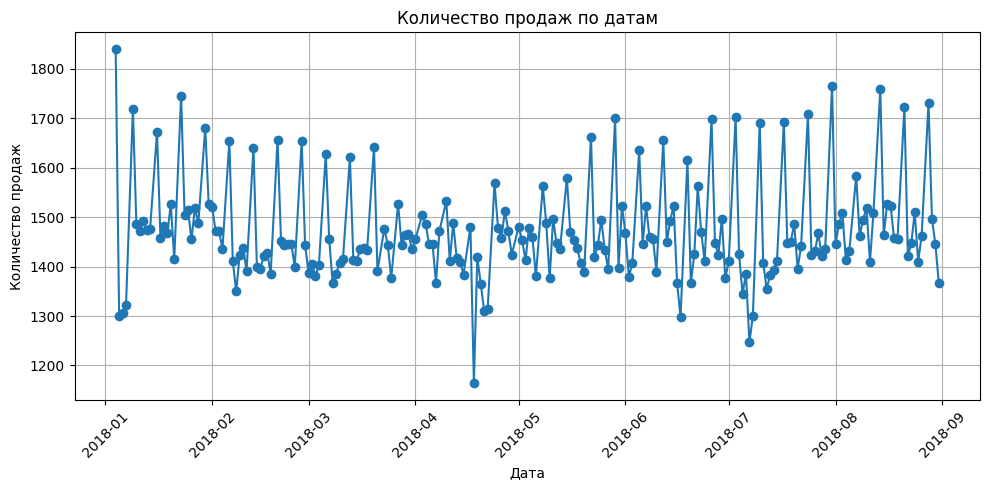

In [507]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')
plt.title('Количество продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [508]:
#в начале 2018г в янв и фев график очень не стабильный. есть резкие пики и впадины
#в дальнейшем в период в апр по авг немного выравнивается хоть и не идеально. всё еще можно увидеть спады хоть и редкие
#можно увидеть "самые" точки: самый пиковый период это самое начало года - янв - и немного меньше показатели в начале и середине авг
#                             самый низкий период - серидина апреля
#мы не знаем что это за продукт нам представлен но можно сделать вывод что данный продукт(ы) не особо связанны с сезонностью 
#тк в течении всего года график не сильно отходит от среднего значения (около 1300) за исключением пиков и падений о которых я уже упомянула ранее

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [509]:
mean_sales = df['Количество'].mean()
std_sales = df['Количество'].std()

threshold = mean_sales + 2 * std_sales

outliers = df[df['Количество'] > threshold]

max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]

print(max_outlier_row)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [510]:
filtered_data = df[df['Дата'].dt.month.isin([6, 7, 8])]

grouped_data = filtered_data.groupby(['Склад', 'Номенклатура']).agg({'Количество': 'sum'}).reset_index()

top_products = grouped_data.loc[grouped_data.groupby('Склад')['Количество'].idxmax()]

print(top_products)

    Склад Номенклатура  Количество
1       1    product_1       17466
24      2    product_1       17790
46      3    product_1       16046
69      4    product_1       17401
92      5    product_1       12635


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

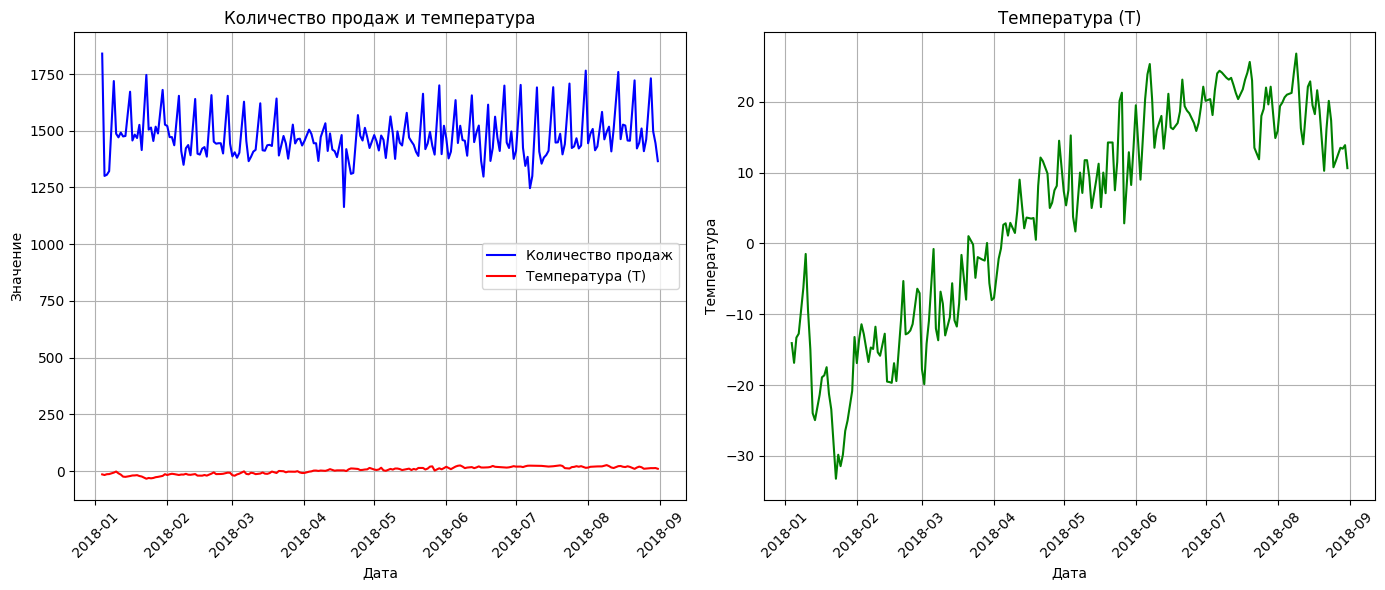

In [511]:
weather = pd.read_csv('weather.csv')

weather['Дата'] = pd.to_datetime(weather['Дата'])
weather['T'] = pd.to_numeric(weather['T'], errors='coerce')


average_temp = weather.groupby('Дата')['T'].mean().reset_index()
average_temp.rename(columns={'T': 'Средняя_T'}, inplace=True)

#print(weather.head(50))
#print(average_temp)

merged_df = pd.merge(grouped_df, average_temp, on='Дата', how='left')

#print(merged_df.head(50))

plt.figure(figsize=(14, 6))

# график кол-ва продаж и температуры
plt.subplot(1, 2, 1)
plt.plot(merged_df['Дата'], merged_df['Количество'], label='Количество продаж', color='blue')
plt.plot(merged_df['Дата'], merged_df['Средняя_T'], label='Температура (T)', color='red')
plt.title('Количество продаж и температура')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# график температуры
plt.subplot(1, 2, 2)
plt.plot(merged_df['Дата'], merged_df['Средняя_T'], label='Температура (T)', color='green')
plt.title('Температура (T)')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()